In [6]:
import glob
import os
import pandas as pd
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import sklearn.preprocessing as preproc
import sklearn.linear_model as lm
import sklearn.pipeline
from sklearn import decomposition
from scipy.optimize import least_squares
import geopandas as gpd
from requests import get,Session
import wget
from census import Census
from us import states
%matplotlib inline

In [26]:
gdf = gpd.read_file('/Users/nehrkorn/Downloads/cb_2016_06_tract_500k/cb_2016_06_tract_500k.shp')
gdf

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,013,359103,1400000US06013359103,06013359103,3591.03,CT,2593523,1170833,"POLYGON ((-122.302287 37.995278, -122.299658 3..."
1,06,013,366001,1400000US06013366001,06013366001,3660.01,CT,1017166,0,"POLYGON ((-122.353307 37.978544, -122.352953 3..."
2,06,013,374000,1400000US06013374000,06013374000,3740,CT,992095,0,"POLYGON ((-122.347509 37.939984, -122.347471 3..."
3,06,013,388000,1400000US06013388000,06013388000,3880,CT,659857,0,"POLYGON ((-122.308489 37.911273, -122.304275 3..."
4,06,017,030710,1400000US06017030710,06017030710,307.10,CT,7898800,0,"POLYGON ((-121.081663 38.692493, -121.079227 3..."
5,06,017,031402,1400000US06017031402,06017031402,314.02,CT,788931825,156657,"POLYGON ((-120.84683 38.558447, -120.845074 38..."
6,06,019,000300,1400000US06019000300,06019000300,3,CT,1887566,0,"POLYGON ((-119.813029 36.72862, -119.805003 36..."
7,06,019,000901,1400000US06019000901,06019000901,9.01,CT,1954608,0,"POLYGON ((-119.817891 36.714015, -119.808901 3..."
8,06,019,001408,1400000US06019001408,06019001408,14.08,CT,1218706,0,"POLYGON ((-119.7364 36.728666, -119.731949 36...."
9,06,019,002300,1400000US06019002300,06019002300,23,CT,1496251,0,"POLYGON ((-119.802846 36.754879, -119.80029 36..."


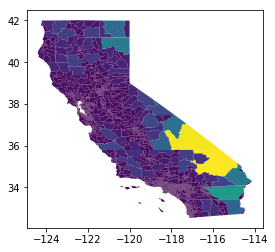

In [5]:
gdf.plot(column='ALAND')

In [7]:
c = Census("fc40d0e5624aa1c5f10cb80e68c8a62d1d5bdc68")
c.acs5.get(('NAME', 'B25034_010E'),
          {'for': 'state:{}'.format(states.MD.fips)})

[{'B25034_010E': 133511.0, 'NAME': 'Maryland', 'state': '24'}]

In [11]:
result = c.acs5.get('NAME,B01001_001E', geo={'for': 'tract:*',
                       'in': 'state:{}'.format(states.CA.fips)})

In [12]:
result

[{'B01001_001E': '3018',
  'NAME': 'Census Tract 4001, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400100'},
 {'B01001_001E': '1960',
  'NAME': 'Census Tract 4002, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400200'},
 {'B01001_001E': '5236',
  'NAME': 'Census Tract 4003, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400300'},
 {'B01001_001E': '4171',
  'NAME': 'Census Tract 4004, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400400'},
 {'B01001_001E': '3748',
  'NAME': 'Census Tract 4005, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400500'},
 {'B01001_001E': '1661',
  'NAME': 'Census Tract 4006, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400600'},
 {'B01001_001E': '4552',
  'NAME': 'Census Tract 4007, Alameda County, California',
  'county': '001',
  'state': '06',
  'tract': '400700'},
 {'B01

In [22]:
df = pd.DataFrame(result)
df['GEOID'] = df.state+df.county+df.tract
df['B01001_001E'] = df['B01001_001E'].astype(int)
df

,B01001_001E,NAME,county,state,tract,GEOID
0,3018,"Census Tract 4001, Alameda County, California",001,06,400100,06001400100
1,1960,"Census Tract 4002, Alameda County, California",001,06,400200,06001400200
2,5236,"Census Tract 4003, Alameda County, California",001,06,400300,06001400300
3,4171,"Census Tract 4004, Alameda County, California",001,06,400400,06001400400
4,3748,"Census Tract 4005, Alameda County, California",001,06,400500,06001400500
5,1661,"Census Tract 4006, Alameda County, California",001,06,400600,06001400600
6,4552,"Census Tract 4007, Alameda County, California",001,06,400700,06001400700
7,3506,"Census Tract 4008, Alameda County, California",001,06,400800,06001400800
8,2262,"Census Tract 4009, Alameda County, California",001,06,400900,06001400900
9,6193,"Census Tract 4010, Alameda County, California",001,06,401000,06001401000


In [27]:
gdf_merge = pd.merge(gdf,df[['B01001_001E','GEOID']],on='GEOID',how='inner')
gdf_merge

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,B01001_001E
0,06,013,359103,1400000US06013359103,06013359103,3591.03,CT,2593523,1170833,"POLYGON ((-122.302287 37.995278, -122.299658 3...",4907
1,06,013,366001,1400000US06013366001,06013366001,3660.01,CT,1017166,0,"POLYGON ((-122.353307 37.978544, -122.352953 3...",4470
2,06,013,374000,1400000US06013374000,06013374000,3740,CT,992095,0,"POLYGON ((-122.347509 37.939984, -122.347471 3...",4246
3,06,013,388000,1400000US06013388000,06013388000,3880,CT,659857,0,"POLYGON ((-122.308489 37.911273, -122.304275 3...",2776
4,06,017,030710,1400000US06017030710,06017030710,307.10,CT,7898800,0,"POLYGON ((-121.081663 38.692493, -121.079227 3...",4983
5,06,017,031402,1400000US06017031402,06017031402,314.02,CT,788931825,156657,"POLYGON ((-120.84683 38.558447, -120.845074 38...",5233
6,06,019,000300,1400000US06019000300,06019000300,3,CT,1887566,0,"POLYGON ((-119.813029 36.72862, -119.805003 36...",3270
7,06,019,000901,1400000US06019000901,06019000901,9.01,CT,1954608,0,"POLYGON ((-119.817891 36.714015, -119.808901 3...",2979
8,06,019,001408,1400000US06019001408,06019001408,14.08,CT,1218706,0,"POLYGON ((-119.7364 36.728666, -119.731949 36....",2522
9,06,019,002300,1400000US06019002300,06019002300,23,CT,1496251,0,"POLYGON ((-119.802846 36.754879, -119.80029 36...",3294


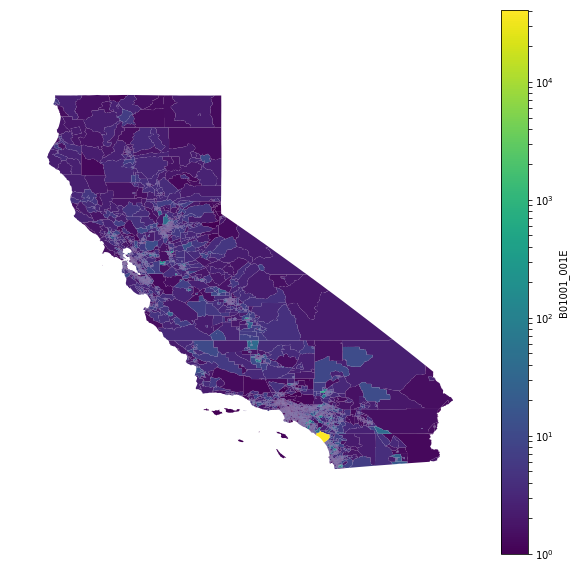

In [42]:
f, ax = plt.subplots(1, figsize=(10, 10))
norm = mpl.colors.LogNorm(vmin=gdf_merge['B01001_001E'].min()+1,vmax=gdf_merge['B01001_001E'].max())
h_plot = gdf_merge.plot(ax=ax, column='B01001_001E',cmap='viridis',vmin = gdf_merge['B01001_001E'].min()+1,vmax=gdf_merge['B01001_001E'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm._A = []
cbar = f.colorbar(sm)
cbar.ax.set_ylabel('B01001_001E')
ax.set_axis_off()
plt.axis('equal');

In [53]:
df.sort_values(by='B01001_001E')

,B01001_001E,NAME,county,state,tract,GEOID
3488,0,"Census Tract 9800.01, Los Angeles County, Cali...",037,06,980001,06037980001
3501,0,"Census Tract 9800.18, Los Angeles County, Cali...",037,06,980018,06037980018
6675,0,"Census Tract 9900, San Luis Obispo County, Cal...",079,06,990000,06079990000
3503,0,"Census Tract 9800.20, Los Angeles County, Cali...",037,06,980020,06037980020
3504,0,"Census Tract 9800.21, Los Angeles County, Cali...",037,06,980021,06037980021
3505,0,"Census Tract 9800.22, Los Angeles County, Cali...",037,06,980022,06037980022
7607,0,"Census Tract 9901, Sonoma County, California",097,06,990100,06097990100
3508,0,"Census Tract 9800.25, Los Angeles County, Cali...",037,06,980025,06037980025
3510,0,"Census Tract 9800.28, Los Angeles County, Cali...",037,06,980028,06037980028
3511,0,"Census Tract 9800.30, Los Angeles County, Cali...",037,06,980030,06037980030


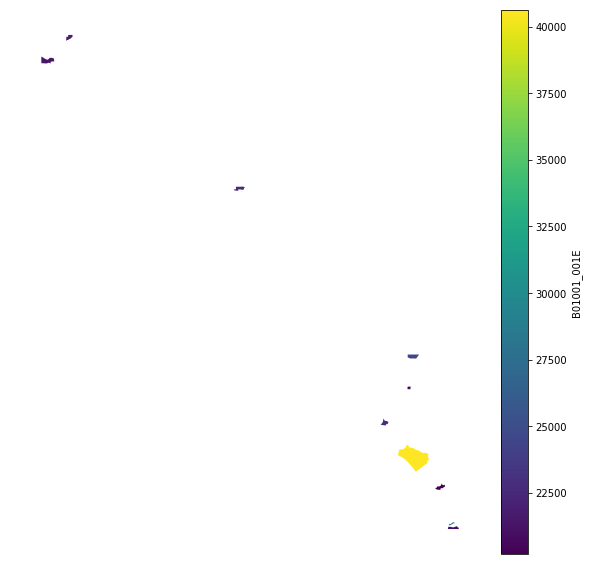

In [62]:
gdf_merge_top10 = gdf_merge.loc[gdf_merge.sort_values(by='B01001_001E').index[-10:],:]
f, ax = plt.subplots(1, figsize=(10, 10))
norm = mpl.colors.Normalize(vmin=gdf_merge_top10['B01001_001E'].min()+1,vmax=gdf_merge_top10['B01001_001E'].max())
h_plot = gdf_merge_top10.plot(ax=ax, column='B01001_001E',cmap='viridis',vmin = gdf_merge_top10['B01001_001E'].min()+1,vmax=gdf_merge_top10['B01001_001E'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm._A = []
cbar = f.colorbar(sm)
cbar.ax.set_ylabel('B01001_001E')
ax.set_axis_off()
plt.axis('equal');

In [60]:
gdf_merge.loc[gdf_merge.sort_values(by='B01001_001E').index[-10:],:]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,B01001_001E
2896,06,073,017030,1400000US06073017030,06073017030,170.30,CT,33370894,1297188,"POLYGON ((-117.178127 33.019174, -117.17656 33...",20209
2641,06,071,002304,1400000US06071002304,06071002304,23.04,CT,9816981,0,"POLYGON ((-117.488418 34.136254, -117.488394 3...",20753
6730,06,073,010014,1400000US06073010014,06073010014,100.14,CT,28491166,19560,"POLYGON ((-117.040482 32.568013, -117.039203 3...",20851
3309,06,077,005206,1400000US06077005206,06077005206,52.06,CT,66727091,1558487,"POLYGON ((-121.557145 37.74660799999999, -121....",21368
3120,06,077,003500,1400000US06077003500,06077003500,35,CT,26417375,54005,"POLYGON ((-121.280885 38.00451, -121.280219 38...",21910
6066,06,059,052420,1400000US06059052420,06059052420,524.20,CT,31543402,142637,"POLYGON ((-117.784399 33.732679, -117.782202 3...",22727
3579,06,107,001003,1400000US06107001003,06107001003,10.03,CT,34601268,39512,"POLYGON ((-119.419973 36.341672, -119.41462 36...",22748
5172,06,071,009118,1400000US06071009118,06071009118,91.18,CT,47642575,0,"POLYGON ((-117.486662 34.494308, -117.486295 3...",24584
7436,06,073,013310,1400000US06073013310,06073013310,133.10,CT,8503029,0,"POLYGON ((-117.028436 32.610754, -117.027115 3...",28861
6608,06,073,018700,1400000US06073018700,06073018700,187,CT,548895417,10394327,"POLYGON ((-117.596147232519 33.3871676935322, ...",40616


In [79]:
df_g16_sr_to_blk = pd.read_csv('/Users/nehrkorn/Downloads/state_g16_sr_blk_map/state_g16_sr_blk_map.csv',dtype={'FIPS':str,'TRACT':str})
df_g16_sr_to_blk

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ELECTION,TYPE,FIPS,SRPREC_KEY,SRPREC,BLOCK_KEY,TRACT,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK
0,g16,sr_blk,06001,06001200100,200100,60014211001000,421100,1000,8,760,1.052632,8,100.00000
1,g16,sr_blk,06001,06001200100,200100,60014211001001,421100,1001,66,760,8.684211,66,100.00000
2,g16,sr_blk,06001,06001200100,200100,60014211001002,421100,1002,48,760,6.315789,55,87.27272
3,g16,sr_blk,06001,06001200100,200100,60014211001003,421100,1003,20,760,2.631579,88,22.72727
4,g16,sr_blk,06001,06001200100,200100,60014211001007,421100,1007,50,760,6.578947,58,86.20689
5,g16,sr_blk,06001,06001200100,200100,60014211001008,421100,1008,40,760,5.263158,40,100.00000
6,g16,sr_blk,06001,06001200100,200100,60014211001009,421100,1009,94,760,12.368420,94,100.00000
7,g16,sr_blk,06001,06001200100,200100,60014211001010,421100,1010,113,760,14.868420,120,94.16666
8,g16,sr_blk,06001,06001200100,200100,60014211001011,421100,1011,104,760,13.684210,104,100.00000
9,g16,sr_blk,06001,06001200100,200100,60014211001012,421100,1012,3,760,0.394737,3,100.00000


In [80]:
df_g16_sor_vote = pd.read_csv('data/SWDB/state_g16_voters_by_g16_srprec/state_g16_voters_by_g16_srprec.csv',dtype={'FIPS':str})
df_g16_sor_vote

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ELECTION,TYPE,FIPS,SRPREC_KEY,SRPREC,TOTREG_R,DEM,REP,AIP,PAF,...,IREG9G,OREG1G,OREG2G,OREG3G,OREG4G,OREG5G,OREG6G,OREG7G,OREG8G,OREG9G
0,g16,V,06001,06001200100,200100,650,488,29,4,0,...,21,10,2,1,1,2,0,1,0,4
1,g16,V,06001,06001200200,200200,626,472,30,8,4,...,17,5,2,4,2,1,0,0,1,7
2,g16,V,06001,06001200300,200300,496,363,21,1,2,...,10,6,0,1,1,1,0,0,1,2
3,g16,V,06001,06001200600,200600,574,431,18,7,1,...,10,7,2,1,2,2,0,1,1,7
4,g16,V,06001,06001200700,200700,576,428,16,4,0,...,15,10,1,1,0,2,0,2,0,3
5,g16,V,06001,06001200800,200800,551,406,27,4,0,...,25,5,1,0,2,0,0,1,1,8
6,g16,V,06001,06001201000,201000,554,415,30,3,1,...,15,7,2,0,2,0,1,1,3,0
7,g16,V,06001,06001201100,201100,580,442,13,6,0,...,22,4,2,1,1,1,0,3,0,2
8,g16,V,06001,06001201300,201300,556,428,10,3,1,...,11,6,1,2,0,3,0,1,0,2
9,g16,V,06001,06001201400,201400,593,454,20,4,0,...,19,6,0,1,1,1,0,1,1,1


In [81]:
df_swdb = pd.merge(df_g16_sor_vote,df_g16_sr_to_blk,on='SRPREC_KEY',how='inner')
df_swdb

,ELECTION_x,TYPE_x,FIPS_x,SRPREC_KEY,SRPREC_x,TOTREG_R,DEM,REP,AIP,PAF,...,FIPS_y,SRPREC_y,BLOCK_KEY,TRACT,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK
0,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001000,421100,1000,8,760,1.052632,8,100.00000
1,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001001,421100,1001,66,760,8.684211,66,100.00000
2,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001002,421100,1002,48,760,6.315789,55,87.27272
3,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001003,421100,1003,20,760,2.631579,88,22.72727
4,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001007,421100,1007,50,760,6.578947,58,86.20689
5,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001008,421100,1008,40,760,5.263158,40,100.00000
6,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001009,421100,1009,94,760,12.368420,94,100.00000
7,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001010,421100,1010,113,760,14.868420,120,94.16666
8,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001011,421100,1011,104,760,13.684210,104,100.00000
9,g16,V,06001,06001200100,200100,650,488,29,4,0,...,06001,200100,60014211001012,421100,1012,3,760,0.394737,3,100.00000


In [82]:
df_swdb['TOTREG_R_BLK'] = df_swdb['PCTSRPREC'] * df_swdb['TOTREG_R'] /100.
df_swdb

,ELECTION_x,TYPE_x,FIPS_x,SRPREC_KEY,SRPREC_x,TOTREG_R,DEM,REP,AIP,PAF,...,SRPREC_y,BLOCK_KEY,TRACT,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK,TOTREG_R_BLK
0,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001000,421100,1000,8,760,1.052632,8,100.00000,6.842108
1,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001001,421100,1001,66,760,8.684211,66,100.00000,56.447372
2,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001002,421100,1002,48,760,6.315789,55,87.27272,41.052628
3,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001003,421100,1003,20,760,2.631579,88,22.72727,17.105263
4,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001007,421100,1007,50,760,6.578947,58,86.20689,42.763156
5,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001008,421100,1008,40,760,5.263158,40,100.00000,34.210527
6,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001009,421100,1009,94,760,12.368420,94,100.00000,80.394730
7,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001010,421100,1010,113,760,14.868420,120,94.16666,96.644730
8,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001011,421100,1011,104,760,13.684210,104,100.00000,88.947365
9,g16,V,06001,06001200100,200100,650,488,29,4,0,...,200100,60014211001012,421100,1012,3,760,0.394737,3,100.00000,2.565790


THIS NEEDS FIXING... TRACT DOESN'T SEEM TO HAVE LEADING ZEROS

In [83]:
df_swdb['GEOID'] = df_swdb['FIPS_x'] + df_swdb['TRACT']
df_swdb

,ELECTION_x,TYPE_x,FIPS_x,SRPREC_KEY,SRPREC_x,TOTREG_R,DEM,REP,AIP,PAF,...,BLOCK_KEY,TRACT,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK,TOTREG_R_BLK,GEOID
0,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001000,421100,1000,8,760,1.052632,8,100.00000,6.842108,06001421100
1,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001001,421100,1001,66,760,8.684211,66,100.00000,56.447372,06001421100
2,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001002,421100,1002,48,760,6.315789,55,87.27272,41.052628,06001421100
3,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001003,421100,1003,20,760,2.631579,88,22.72727,17.105263,06001421100
4,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001007,421100,1007,50,760,6.578947,58,86.20689,42.763156,06001421100
5,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001008,421100,1008,40,760,5.263158,40,100.00000,34.210527,06001421100
6,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001009,421100,1009,94,760,12.368420,94,100.00000,80.394730,06001421100
7,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001010,421100,1010,113,760,14.868420,120,94.16666,96.644730,06001421100
8,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001011,421100,1011,104,760,13.684210,104,100.00000,88.947365,06001421100
9,g16,V,06001,06001200100,200100,650,488,29,4,0,...,60014211001012,421100,1012,3,760,0.394737,3,100.00000,2.565790,06001421100


In [86]:
reg_by_tract_swdb = df_swdb.groupby('GEOID')['TOTREG_R_BLK','BLKREG'].sum()

In [88]:
reg_by_tract_swdb.sort_values(by='TOTREG_R_BLK')

,TOTREG_R_BLK,BLKREG
GEOID,,
06053980000,0.609583,1
06037980022,0.701538,1
06037980006,0.752709,1
06037980007,0.788284,1
06037980003,1.000000,3
060294601,1.000000,2
06037320000,1.000000,1
06037980002,1.166251,2
06037980025,1.240914,2
